<a href="https://colab.research.google.com/github/matyi101/codes/blob/main/Meeting_4_Assignment_Nazri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MOHD NAZRI NAWI**

# **Meeting 4 Assignment**

Using the dataset provided in elearning, perform these tasks:


1.   Upload the data using pandas dataframe function, make sure the dataframe has the date as the index, and sales is the target value
2. Perform a few steps of EDA
2.   Show 2 examples of accessing a row of certain dates
3.   Create a column on the dataframe that calculate rolling mean based on sales number
4. Using Linear Regression, fit a model to forecast the sales. 











In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv', parse_dates=['date'],index_col='date').drop(['id','family','onpromotion'], axis=1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   store_nbr  int64  
 1   sales      float64
dtypes: float64(1), int64(1)
memory usage: 68.7 MB


In [3]:
df = data

In [4]:
df.head()

,store_nbr,sales
date,,
2013-01-01,1,0.0
2013-01-01,1,0.0
2013-01-01,1,0.0
2013-01-01,1,0.0
2013-01-01,1,0.0


In [5]:
df.tail()

,store_nbr,sales
date,,
2017-08-15,9,438.133
2017-08-15,9,154.553
2017-08-15,9,2419.729
2017-08-15,9,121.000
2017-08-15,9,16.000


In [6]:
# View the data statistics
df.describe()

,store_nbr,sales
count,3.000888e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02
std,1.558579e+01,1.101998e+03
min,1.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00
50%,2.750000e+01,1.100000e+01
75%,4.100000e+01,1.958473e+02
max,5.400000e+01,1.247170e+05


In [7]:
df[df.index.day == 10]

,store_nbr,sales
date,,
2013-01-10,1,2.00000
2013-01-10,1,0.00000
2013-01-10,1,3.00000
2013-01-10,1,847.00000
2013-01-10,1,0.00000
...,...,...
2017-08-10,9,291.82098
2017-08-10,9,111.93000
2017-08-10,9,1036.43900


In [8]:
df['2013-04-01':'2013-06-01']

,store_nbr,sales
date,,
2013-04-01,1,0.000
2013-04-01,1,0.000
2013-04-01,1,1.000
2013-04-01,1,931.000
2013-04-01,1,0.000
...,...,...
2013-06-01,9,709.914
2013-06-01,9,79.000
2013-06-01,9,0.000


<function matplotlib.pyplot.show>

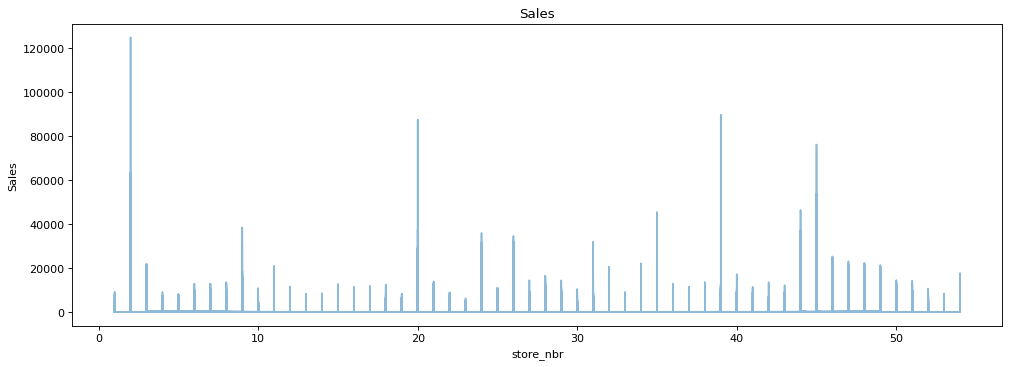

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(15, 5), dpi=80)

plt.plot(df.store_nbr, df.sales, alpha=0.5)
plt.xlabel("store_nbr")
plt.ylabel("Sales")
plt.title("Sales")
plt.show

In [10]:
df = df.drop(['store_nbr'], axis = 1)
df

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [11]:
# Calculate 30d and 90d rolling mean for the last sales
df['rolling_sum'] = df.rolling('30D').mean()
df.head(10)


,sales,rolling_sum
date,,
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0
2013-01-01,0.0,0.0


In [12]:
#shifting your data into the future using .shift()

df['shifted']=df.rolling_sum.shift()
df.head()

,sales,rolling_sum,shifted
date,,,
2013-01-01,0.0,0.0,NaN
2013-01-01,0.0,0.0,0.0
2013-01-01,0.0,0.0,0.0
2013-01-01,0.0,0.0,0.0
2013-01-01,0.0,0.0,0.0


In [13]:
df['days_from_start'] = (df.index - df.index[0]).days; df

,sales,rolling_sum,shifted,days_from_start
date,,,,
2013-01-01,0.000,0.000000,NaN,0
2013-01-01,0.000,0.000000,0.000000,0
2013-01-01,0.000,0.000000,0.000000,0
2013-01-01,0.000,0.000000,0.000000,0
2013-01-01,0.000,0.000000,0.000000,0
...,...,...,...,...
2017-08-15,438.133,467.349138,467.349685,1687
2017-08-15,154.553,467.343287,467.349138,1687
2017-08-15,2419.729,467.379808,467.343287,1687


In [14]:
X = df['days_from_start'].values.reshape(-1, 1)
y = df['sales']

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(X,y)

y_pred = reg.predict(X)
y_pred

array([194.32588499, 194.32588499, 194.32588499, ..., 521.28292752,
       521.28292752, 521.28292752])

In [16]:
# Print R^2 
print(model.score(X,y))

0.007349256215550715


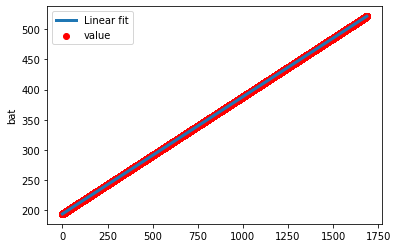

In [17]:
f, ax = plt.subplots(1, 1)
ax.plot(X, y_pred,label='Linear fit', lw=3)
ax.scatter(X, y_pred,label='value', marker='o', color='r')
plt.ylabel('bat')
ax.legend();

plt.show()